In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

df = pd.read_csv('Automobile.csv')
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [2]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


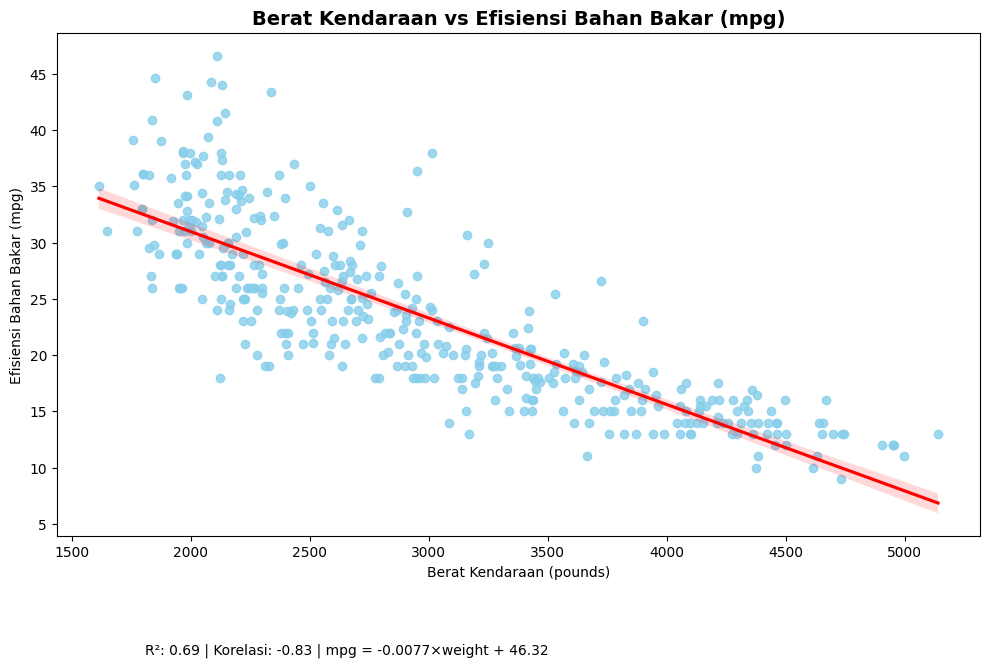

In [4]:
X = df[['weight']]
y = df['mpg']
model = LinearRegression()
model.fit(X, y)

df['predicted_mpg'] = model.predict(X)
slope = model.coef_[0]
intercept = model.intercept_
r2_score = model.score(X, y)
correlation = df[['mpg', 'weight']].corr().iloc[0, 1]

plt.figure(figsize=(10, 6))
sns.regplot(x='weight', y='mpg', data=df, scatter_kws={'color': 'skyblue'}, line_kws={'color': 'red'})
plt.title('Berat Kendaraan vs Efisiensi Bahan Bakar (mpg)', fontsize=14, weight='bold')
plt.xlabel('Berat Kendaraan (pounds)')
plt.ylabel('Efisiensi Bahan Bakar (mpg)')
plt.figtext(0.15, -0.1, f'R²: {r2_score:.2f} | Korelasi: {correlation:.2f} | mpg = {slope:.4f}×weight + {intercept:.2f}', fontsize=10)
plt.tight_layout()
plt.show()

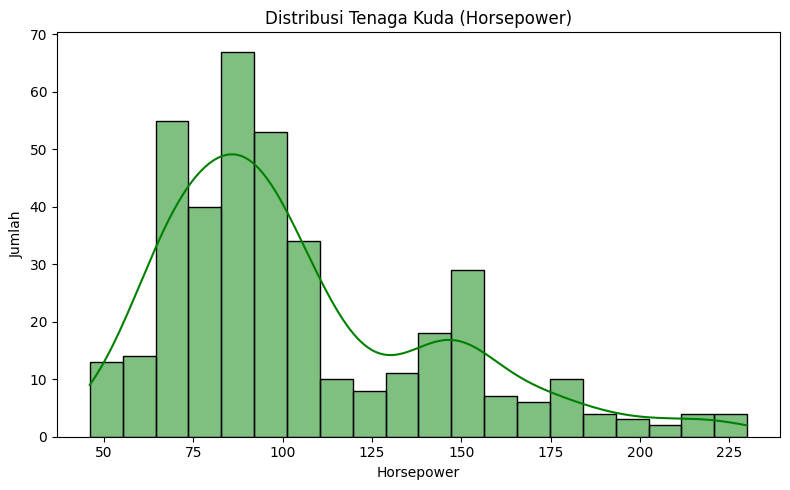

In [3]:
plt.figure(figsize=(8, 5))
sns.histplot(df['horsepower'], kde=True, color='green', bins=20)
plt.title('Distribusi Tenaga Kuda (Horsepower)')
plt.xlabel('Horsepower')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

/tmp/ipykernel_5562/2158444192.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='origin', y='mpg', data=df, palette='Set2')


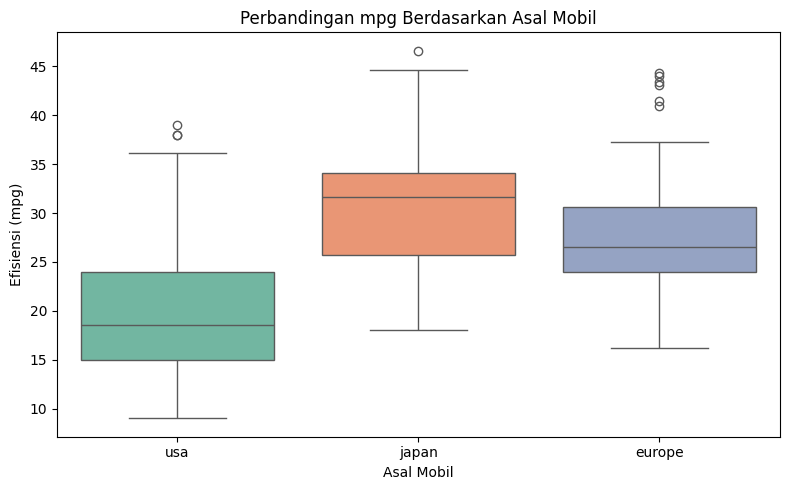

In [5]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='origin', y='mpg', data=df, palette='Set2')
plt.title('Perbandingan mpg Berdasarkan Asal Mobil')
plt.xlabel('Asal Mobil')
plt.ylabel('Efisiensi (mpg)')
plt.tight_layout()
plt.show()

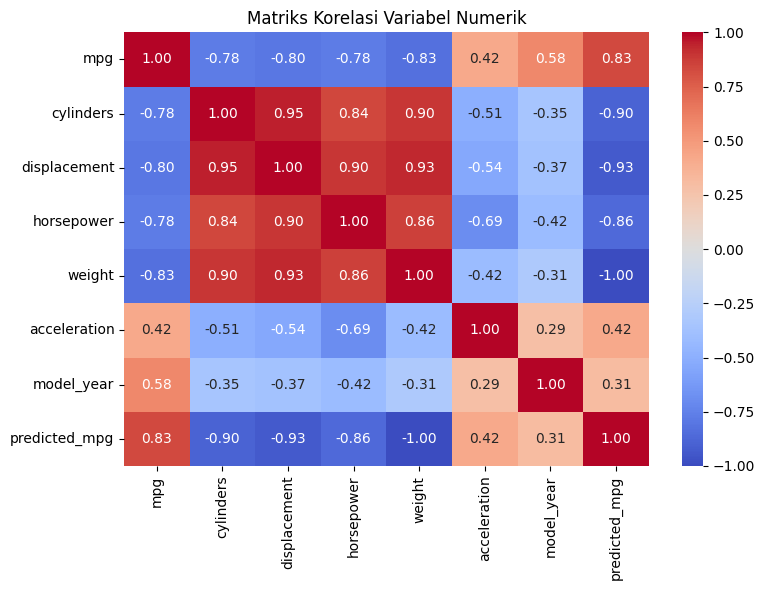

In [6]:
plt.figure(figsize=(8, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Variabel Numerik')
plt.tight_layout()
plt.show()